# Funciones de distribución de probabilidades
## Distribución Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1 # Rango inferior
b = 100 # Rango superior
n = 20000 # Numero de muestras
# Funcion para generar numeros aleatorios siguiendo una distribucion de probabilidad
data = np.random.uniform(a, b, n).tolist() # Cambio el tipo de dato de ndarray a list
type (data)

list

(array([1917., 1978., 2015., 1961., 1979., 2003., 2043., 2028., 2069.,
        2007.]),
 array([ 1.01020092, 10.90827614, 20.80635136, 30.70442658, 40.6025018 ,
        50.50057702, 60.39865224, 70.29672746, 80.19480268, 90.0928779 ,
        99.99095312]),
 <a list of 10 Patch objects>)

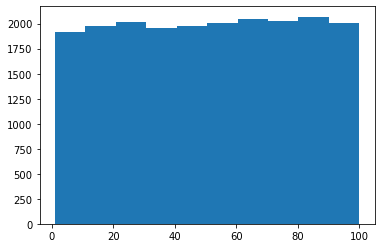

In [3]:
%matplotlib inline
plt.hist(data)

## Distribución Normal o Campana de Gaus ("Bell Curve, Standard Normal Distribution")
### Ocurre en el 98 porciento en situaciones diarias, por ejemplo, las calificaciones de una materia
#### La ley de los grandes numeros: Si se añaden mas datos, a la larga todo (o la mayoria) de las variables aleatorias presentarán la forma normal
Como ya sabes, los parámetros que definen la distrubción estandar, son la media y la desviación estandar (desviación tipica segun el español)

In [4]:
data_normal = np.random.randn(1000)
# Como ya sabemos, la funcion regresa una distribucion normal estandarizada, es decir, con media igual a cero y desviacion estandar igual a 1
# Como ejercicio, vamos a "Des-estandarizar esta distribucion con desviacion estandar de 10 y media de 50"
u = 50
o = 10

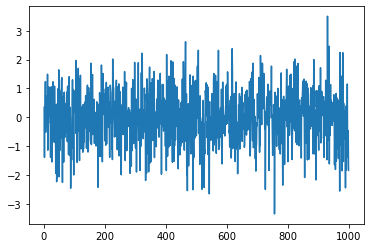

In [5]:
x = range(1,1001)
plt.plot(x,data_normal)
# Esta gráfica en x representa la posicion en el array, y x el valor

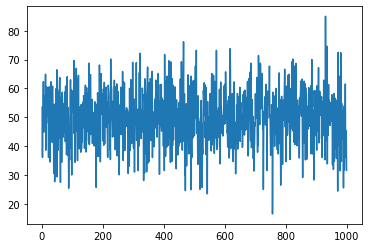

In [6]:
# Proceso de convercion de una variable estandarizada (z con media de 0 y desviacion estandar de 1) a otra variable (x con media de 50 y desviacion estandar de 10)
data_x = o*data_normal + u
plt.plot(x,data_x)
# Como puede observarse tiene la misma forma que una grafica de una variable estandarizada, solo cambia la escala

(array([  1.,  20.,  70., 168., 259., 267., 158.,  46.,  10.,   1.]),
 array([-3.34549208, -2.66071282, -1.97593356, -1.2911543 , -0.60637504,
         0.07840422,  0.76318348,  1.44796274,  2.132742  ,  2.81752126,
         3.50230052]),
 <a list of 10 Patch objects>)

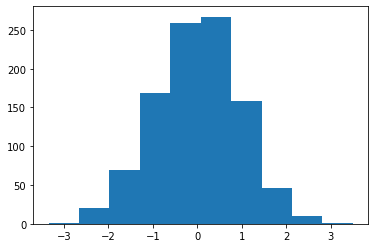

In [7]:
## Histograma
plt.hist(data_normal)

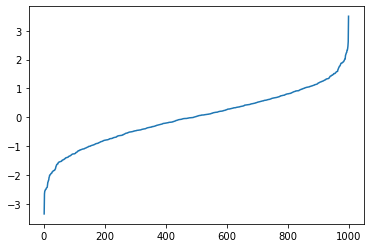

In [8]:
plt.plot(x,sorted(data_normal)) # Fucion de distribucion acumulada

(array([  2.,  20.,  53., 125., 230., 240., 167., 115.,  36.,  12.]),
 array([16.54046622, 22.94987672, 29.35928722, 35.76869772, 42.17810822,
        48.58751872, 54.99692922, 61.40633972, 67.81575022, 74.22516072,
        80.63457122]),
 <a list of 10 Patch objects>)

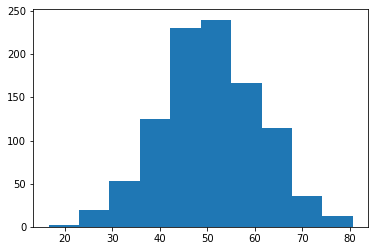

In [9]:
# El proceso que realizaste (des-estandarizacion), se puede hacer automáticamente con lo siguiente
# Usando la misma media y desviacion estandar
mu = u # Media
sd = o # Desviacion estandar (Standar Desviation)
n = 1000
data_x = np.random.normal(mu,sd,n)
plt.hist(data_x)

In [10]:
# La siguiente funcion regresa m listas de n valores en distribucion normal
n = 2
m = 5
np.random.rand(n,m)

array([[0.23069024, 0.36708514, 0.91717557, 0.13106137, 0.58454264],
       [0.87199522, 0.52228094, 0.66586392, 0.90989564, 0.50604432]])

# La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π. 

La siguiente simulación esta hecha en el sector 1,1 del cuadrado

In [11]:
# n_exp: Numero de repeticiones del experimento
# n: Numero de veces que "se tira la piedra"
def pi_montecarlo(n, n_exp):
    # Promedio de pi
    pi_avg = 0
    # Lista de pi's
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] ** 2 + y[j] ** 2)
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    #fig = plt.plot(pi_value_list)
    return (pi, pi_value_list)

In [12]:
pi, pi_list = pi_montecarlo(10000, 2000)
pi

3.1416626000000054


3.1416626000000054

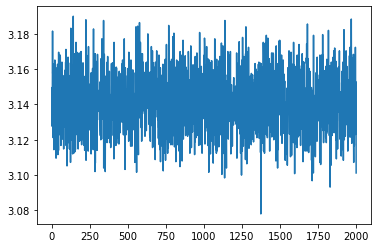

In [13]:
plt.plot(pi_list)

# Dummy Dataset
Generar data frames con las funciones random

In [14]:
n = 1000000
data = pd.DataFrame(
    {
        'A': np.random.randn(n),
        'B': 1.5 + 2.5 * np.random.randn(n),
        'C': np.random.uniform(5,32,n)
    }
)
data.head(10)

,A,B,C
0,1.657781,3.134396,10.077522
1,1.914257,2.403794,5.783662
2,-0.193187,2.751335,17.593589
3,-0.425017,0.684825,9.738047
4,-0.199451,2.390333,6.379340
5,-0.167142,-0.314789,6.111951
6,0.210252,2.992324,23.419218
7,-1.078757,-4.794046,31.865406
8,0.699625,3.716010,13.449788
9,0.609237,-0.971787,21.395707


In [15]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000907,1.499310,18.492737
std,0.999847,2.499761,7.790508
min,-4.875664,-10.130765,5.000007
25%,-0.673222,-0.185963,11.741771
50%,0.001728,1.502237,18.490353
75%,0.673776,3.185946,25.234174
max,4.602618,14.073788,31.999991


(array([4.70000e+01, 1.41700e+03, 1.93720e+04, 1.18157e+05, 3.06305e+05,
        3.45914e+05, 1.69429e+05, 3.58950e+04, 3.34000e+03, 1.24000e+02]),
 array([-4.87566418, -3.92783595, -2.98000771, -2.03217948, -1.08435124,
        -0.13652301,  0.81130522,  1.75913346,  2.70696169,  3.65478993,
         4.60261816]),
 <a list of 10 Patch objects>)

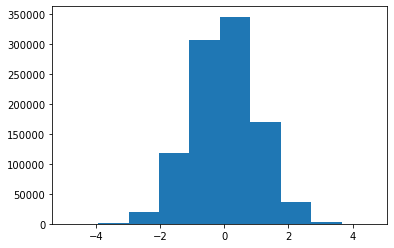

In [16]:
plt.hist(data["A"])

In [17]:
mainpath = "E:/Curso de Python/Repositorio/python-ml-course/datasets/"
filepath = "customer-churn-model/Customer Churn Model.txt"
data = pd.read_csv(os.path.join(mainpath,filepath))
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [18]:
column_names = data.columns.values.tolist()

In [19]:
a = len(column_names)
a

21

In [20]:
new_data = pd.DataFrame(
    {
        "Column Name" : column_names,
        "A" : np.random.randn(a),
        "B" : np.random.uniform(0,1,a)
    }, index = range (1, 1 + a)
)
new_data

,Column Name,A,B
1,State,0.836235,0.028742
2,Account Length,-1.675574,0.764329
3,Area Code,-0.001832,0.991205
4,Phone,1.042876,0.664180
5,Int'l Plan,-0.490292,0.729108
6,VMail Plan,0.013695,0.451309
7,VMail Message,0.382226,0.014543
8,Day Mins,-0.414081,0.901586
9,Day Calls,0.021393,0.623379
10,Day Charge,0.505117,0.113123
